In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings

# Filter out import warnings
warnings.filterwarnings("ignore", category=ImportWarning)

In [52]:
df = pd.read_csv('data/updated_data.csv')
df

/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_69272/1294517716.py:1: DtypeWarning: Columns (2283) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/updated_data.csv')


,OP_UNIQUE_CARRIER_9E,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_DL,OP_UNIQUE_CARRIER_HA,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_YX,TAIL_NUM_N101DU,...,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew_Point,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,0,0,0,1,0,0,0,0,0,0,...,324,323,448,48,34,38,29.86,9,17,14
1,0,0,0,1,0,0,0,0,0,0,...,340,333,531,48,34,38,29.86,9,17,15
2,0,0,0,1,0,0,0,0,0,0,...,301,341,482,48,34,38,29.86,9,17,22
3,0,0,0,1,0,0,0,0,0,0,...,345,343,513,48,34,38,29.86,9,17,12
4,0,0,0,0,1,0,0,0,0,0,...,360,356,499,46,32,35,29.91,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,0,0,0,1,0,0,0,0,0,0,...,1370,1372,1427,39,38,0,30.18,20,32,19
28816,0,1,0,0,0,0,0,0,0,0,...,1390,1392,25,39,38,0,30.18,19,23,22
28817,0,0,1,0,0,0,0,0,0,0,...,1125,1408,1337,39,38,0,30.18,19,23,21
28818,0,0,0,1,0,0,0,0,0,0,...,1417,1422,261,39,38,0,30.18,19,23,13


In [53]:
data = df.reindex(columns=['DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew_Point', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr', 'TAXI_OUT'])
data

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew_Point,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,-1,124,636,324,323,448,48,34,38,29.86,9,17,14
1,-7,371,2475,340,333,531,48,34,38,29.86,9,17,15
2,40,181,1069,301,341,482,48,34,38,29.86,9,17,22
3,-2,168,944,345,343,513,48,34,38,29.86,9,17,12
4,-4,139,760,360,356,499,46,32,35,29.91,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,2,57,150,1370,1372,1427,39,38,0,30.18,20,32,19
28816,2,75,187,1390,1392,25,39,38,0,30.18,19,23,22
28817,283,392,2422,1125,1408,1337,39,38,0,30.18,19,23,21
28818,5,224,1598,1417,1422,261,39,38,0,30.18,19,23,13


In [54]:
data_to_use = data.iloc[:,0:12]
data_to_use

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew_Point,Wind Gust,Pressure,sch_dep,sch_arr
0,-1,124,636,324,323,448,48,34,38,29.86,9,17
1,-7,371,2475,340,333,531,48,34,38,29.86,9,17
2,40,181,1069,301,341,482,48,34,38,29.86,9,17
3,-2,168,944,345,343,513,48,34,38,29.86,9,17
4,-4,139,760,360,356,499,46,32,35,29.91,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...
28815,2,57,150,1370,1372,1427,39,38,0,30.18,20,32
28816,2,75,187,1390,1392,25,39,38,0,30.18,19,23
28817,283,392,2422,1125,1408,1337,39,38,0,30.18,19,23
28818,5,224,1598,1417,1422,261,39,38,0,30.18,19,23


In [55]:
data_to_target = data.iloc[:,12]
data_to_target

0        14
1        15
2        22
3        12
4        13
         ..
28815    19
28816    22
28817    21
28818    13
28819    15
Name: TAXI_OUT, Length: 28820, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data_to_use, data_to_target, test_size=20, random_state=32)


In [57]:
## linear regression model...Training
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = LR.predict(X_test)
y_pred

array([22.46635987, 22.78062398, 23.20724739, 25.33095827, 18.41998693,
       18.11694829, 23.64633916, 18.94990448, 18.1633704 , 22.40493819,
       23.57576039, 22.95645024, 20.79973252, 20.68353155, 20.11053144,
       21.2562442 , 22.49142617, 23.04157149, 20.53175464, 22.75535696])

In [59]:
result = {'Actual_taxi_out': y_test, 'Predicted_taxi_out': y_pred}
result_df = pd.DataFrame(result)
result_df

,Actual_taxi_out,Predicted_taxi_out
9362,23,22.466360
23840,14,22.780624
24617,22,23.207247
24899,19,25.330958
2007,20,18.419987
8034,16,18.116948
7222,21,23.646339
17910,16,18.949904
911,16,18.163370
10602,19,22.404938


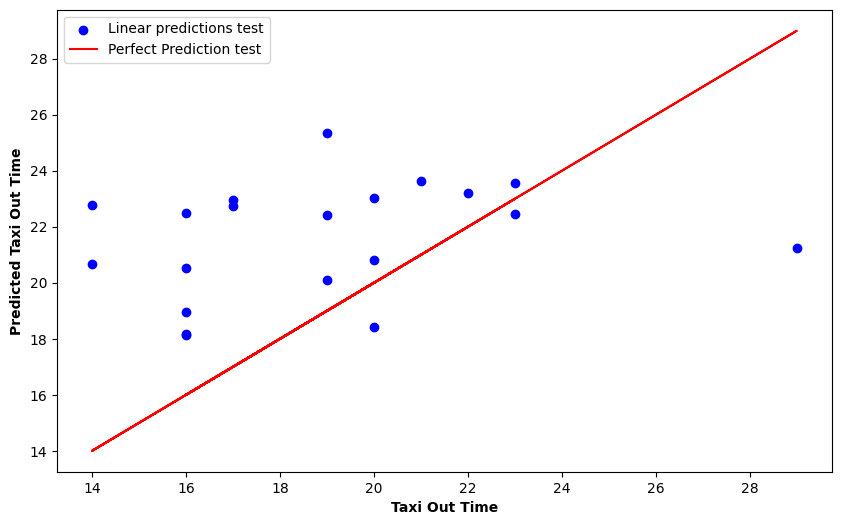

In [60]:
# Scatter plot with linear regression line
plt.figure(figsize=(10, 6))

plt.scatter(result_df['Actual_taxi_out'], result_df['Predicted_taxi_out'], color='blue', label='Linear predictions test')

plt.plot(result_df['Actual_taxi_out'], result_df['Actual_taxi_out'], color='red', label='Perfect Prediction test')

plt.xlabel('Taxi Out Time', fontweight='bold')
plt.ylabel('Predicted Taxi Out Time', fontweight='bold')
plt.legend()
plt.show()



each blue represents the actual vs predicted values
the linear regression line is the actual values 
this shows how well the linear regression model fits the data 
high variants as most of the predicted values are far away from the linear regression line during the test

In [61]:

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 3.7201927284606966
Root Mean Squared Error (RMSE): 4.501383380462902
R2 Score: -0.6174378238202052
Mean Squared Error (MSE): 20.26245233790762


/Users/james/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [62]:
# Predictions on training data
y_train_pred = LR.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error (MAE) for training data:", mae_train)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
print("Root Mean Squared Error (RMSE) for training data:", rmse_train)
r2_train = r2_score(y_train, y_train_pred)
print("R2 Score for training data:", r2_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) for training data:", mse_train)


Mean Absolute Error (MAE) for training data: 5.249242775185401
Root Mean Squared Error (RMSE) for training data: 6.580159887372596
R2 Score for training data: 0.07813155318379061
Mean Squared Error (MSE) for training data: 43.29850414338733


/Users/james/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
